# ToxiCR Dataset Exploration

This notebook demonstrates how to explore the ToxiCR dataset stored in an Excel file located at:
```
/Users/tayebekavousi/Desktop/github_sa/datasets/binary/code-review-dataset-full.xlsx
```

We will:
1. Display the first 10 rows of the dataset.
2. Sample 3 rows per class (`is_toxic` = 0 vs. `is_toxic` = 1).
3. Visualize the distribution of classes.
4. Analyze text lengths (word count) and display statistics.
5. Generate a word cloud to see the most common words.
6. Prepare a PyTorch `Dataset` and `DataLoader` for fine-tuning.

---

## 1. Importing Required Libraries

We import:
- **pandas** for data handling,
- **numpy** for numerical operations,
- **matplotlib** for plotting,
- **wordcloud** for visualization,
- **torch** (PyTorch) for deep learning,
- **DataLoader** for batching our dataset.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import torch
from torch.utils.data import Dataset, DataLoader

# Enable inline plotting
%matplotlib inline

## 2. Loading the Dataset from Excel

In this cell, we load the dataset from the specified Excel file path. Update the path if necessary.

In [6]:
file_path = "/Users/tayebekavousi/Desktop/github_sa/datasets/binary/code-review-dataset-full.xlsx"  # Path to your Excel file

try:
    df = pd.read_excel(file_path)
    print("Dataset loaded successfully!")
except Exception as e:
    print("Error loading dataset:", e)

print("Dataset shape:", df.shape)

Dataset loaded successfully!
Dataset shape: (19651, 2)


## 3. Display the First 10 Rows

Quickly inspect the dataset by printing the first 10 rows.

In [8]:
print("Head of the dataset (10 rows):")
display(df.head(10))

Head of the dataset (10 rows):


,message,is_toxic
0,This and below assignments also should be removed,0
1,this should be flavor_id = self.flavor_id,0
2,bool session_adopted_ = false;,0
3,"nit: Starting C++11, this could be done direct...",0
4,I am confused.\n \n This is the tar process we...,0
5,"Yuck. Use %.70s, which will do this more grace...",1
6,Use mock_thread_instance = mock.MagicMock(isAl...,0
7,SkRect local_bounds = gfx::RectToSkRect(GetLoc...,0
8,worse!!!!!!! how does setuptools/cliff even do...,0
9,so you have rename fields to obj_fields becaus...,0


## 4. Sampling 3 Rows from Each Class

We'll sample 3 rows per class (0 = non-toxic, 1 = toxic) to see a quick preview of each category.

In [10]:
if 'is_toxic' in df.columns:
    # Group by 'is_toxic' and sample 3 rows per group
    try:
        sample_df = df.groupby('is_toxic').apply(lambda x: x.sample(n=3, random_state=42)).reset_index(drop=True)
        print("Sample (3 rows per class):")
        display(sample_df)
    except ValueError as e:
        print("Sampling error:", e)
else:
    print("Column 'is_toxic' not found in the dataset.")

Sample (3 rows per class):


/var/folders/xc/qkmv0r456dn4gsy6rfgnpns80000gn/T/ipykernel_61210/2044819233.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample_df = df.groupby('is_toxic').apply(lambda x: x.sample(n=3, random_state=42)).reset_index(drop=True)


,message,is_toxic
0,"Seems, cleanup_network_group() method should b...",0
1,"Most modern tests in SW land use promise_test,...",0
2,user_id = CONF.castellan.user_id,0
3,I astyled the whole damn thing!,1
4,Oh damn it's so misleading.\n \n stack@virtua...,1
5,KILL IT WITH FIRE!,1


## 5. Distribution Analysis of Classes

We visualize the distribution of `is_toxic` classes using a bar chart.

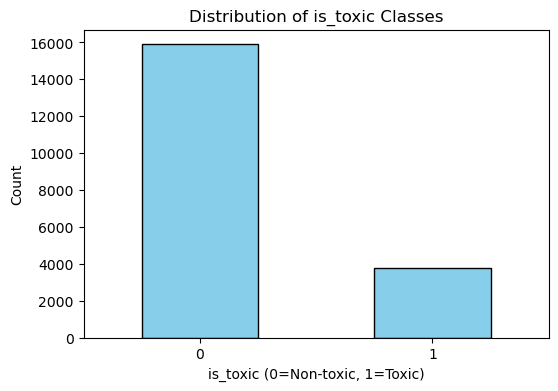

In [12]:
if 'is_toxic' in df.columns:
    class_counts = df['is_toxic'].value_counts()
    
    plt.figure(figsize=(6, 4))
    class_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title("Distribution of is_toxic Classes")
    plt.xlabel("is_toxic (0=Non-toxic, 1=Toxic)")
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()
else:
    print("Column 'is_toxic' not found in the dataset.")

## 6. Text Length (Word) Analysis

Here, we compute the word count for each message, then show average, median, min, and max. Finally, we display a histogram of word counts.

Text Length Analysis (in words):
Average Length: 17.57
Median Length: 12.0
Maximum Length: 639
Minimum Length: 1


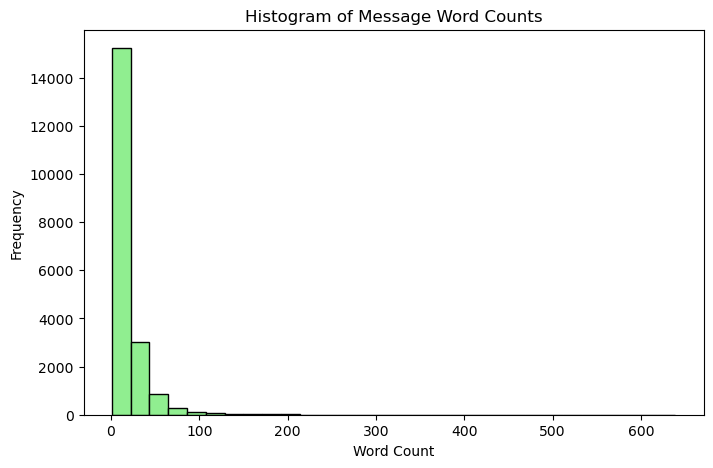

In [14]:
if 'message' in df.columns:
    df['word_count'] = df['message'].astype(str).apply(lambda x: len(x.split()))
    
    avg_length = df['word_count'].mean()
    median_length = df['word_count'].median()
    max_length = df['word_count'].max()
    min_length = df['word_count'].min()
    
    print("Text Length Analysis (in words):")
    print(f"Average Length: {avg_length:.2f}")
    print(f"Median Length: {median_length}")
    print(f"Maximum Length: {max_length}")
    print(f"Minimum Length: {min_length}")
    
    plt.figure(figsize=(8, 5))
    plt.hist(df['word_count'], bins=30, color='lightgreen', edgecolor='black')
    plt.title("Histogram of Message Word Counts")
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("Column 'message' not found in the dataset.")

## 7. Word Distribution Visualization Using Word Cloud

We generate a word cloud from all messages to visualize the most common words.

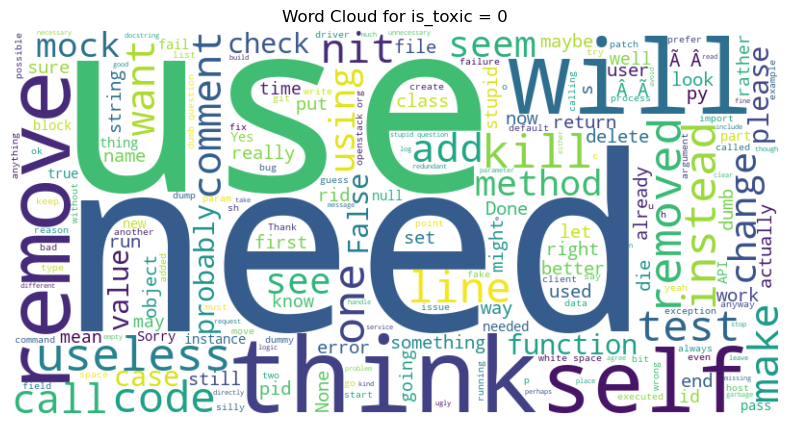

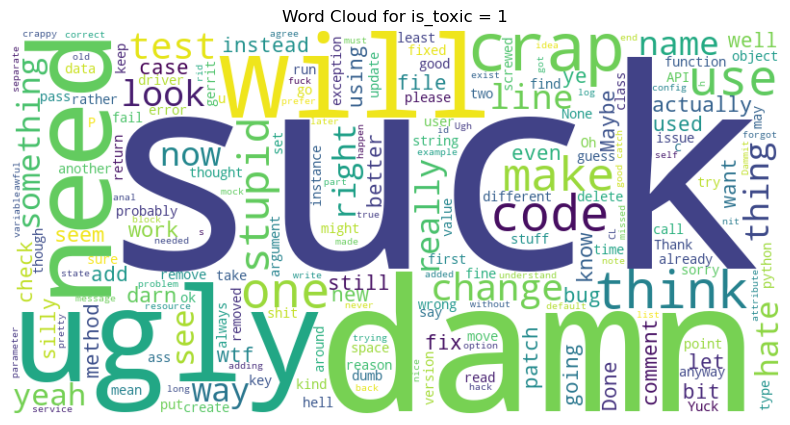

In [16]:
# Word Cloud for Each Class
if 'message' in df.columns and 'is_toxic' in df.columns:
    # Loop over each unique class value (0 or 1)
    for class_value in df['is_toxic'].unique():
        # Filter the DataFrame for the current class
        subset_df = df[df['is_toxic'] == class_value]
        
        # Combine all messages into a single string
        text_combined = " ".join(subset_df['message'].dropna().astype(str).tolist())
        
        # Generate the word cloud
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)
        
        # Display the word cloud
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f"Word Cloud for is_toxic = {class_value}")
        plt.axis("off")
        plt.show()
else:
    print("Either 'message' or 'is_toxic' column not found in the dataset.")
